<a href="https://colab.research.google.com/github/Hardy-Singh/ML-Concepts/blob/main/trainee_prediction_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df= pd.read_csv('balanced_training_outcome_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   YearsOfExperience  100 non-null    int64 
 1   PreviousEmployer   100 non-null    object
 2   PsychometryScore   100 non-null    int64 
 3   QuizScore          100 non-null    int64 
 4   AttendancePercent  100 non-null    int64 
 5   DigitalScore       100 non-null    int64 
 6   RAGScore           100 non-null    object
 7   TrainingOutcome    100 non-null    object
dtypes: int64(5), object(3)
memory usage: 6.4+ KB


In [5]:
df.describe()

,YearsOfExperience,PsychometryScore,QuizScore,AttendancePercent,DigitalScore
count,100.000000,100.00000,100.000000,100.000000,100.000000
mean,4.800000,69.01000,70.820000,76.190000,71.920000
std,3.155883,19.12241,17.388827,16.099247,18.553053
min,0.000000,40.00000,41.000000,50.000000,40.000000
25%,2.750000,52.75000,55.000000,61.000000,54.750000
50%,4.000000,66.00000,72.000000,77.500000,73.500000
75%,8.000000,87.00000,85.000000,92.000000,88.000000
max,10.000000,100.00000,100.000000,100.000000,100.000000


In [6]:
df.head()

,YearsOfExperience,PreviousEmployer,PsychometryScore,QuizScore,AttendancePercent,DigitalScore,RAGScore,TrainingOutcome
0,6,Wipro,99,90,100,69,Green,Clear
1,3,Others,52,49,51,42,Amber,Not Clear
2,4,Infosys,87,68,85,85,Amber,Not Clear
3,0,Wipro,63,97,100,95,Green,Not Clear
4,10,Others,63,50,73,62,Green,Clear


# Column wise data analysis on YearsOfExperience, PreviousEmployer and RAGRating

In [7]:
df['YearsOfExperience'].value_counts()

,count
YearsOfExperience,
4,15
8,14
3,12
0,12
10,9
5,8
1,7
6,6
7,6


In [8]:
df['PreviousEmployer'].value_counts(ascending= True)

,count
PreviousEmployer,
Infosys,12
Capgemini,12
Accenture,13
Others,13
TCS,13
Wipro,16
IBM,21


In [9]:
df['RAGScore'].value_counts()

,count
RAGScore,
Green,42
Amber,34
Red,24


In [10]:
# Identifying the final outcome value wise
df['TrainingOutcome'].value_counts()

,count
TrainingOutcome,
Clear,50
Not Clear,50


In [11]:
# Separating numerical and categorical columns

numeric_columns= df[['YearsOfExperience', 'PsychometryScore', 'QuizScore',	'AttendancePercent', 'DigitalScore']]
categorical_columns= df[['PreviousEmployer', 'RAGScore', 'TrainingOutcome']]



In [12]:
#Scaled the numeric columns

import seaborn as sns
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

scaled_numeric_columns= scaler.fit_transform(numeric_columns)

df_scaled_numeric_columns = pd.DataFrame(scaled_numeric_columns, columns=numeric_columns.columns)
df_scaled_numeric_columns.head()

,YearsOfExperience,PsychometryScore,QuizScore,AttendancePercent,DigitalScore
0,0.382158,1.576218,1.108564,1.486402,-0.158179
1,-0.573237,-0.894014,-1.261150,-1.572552,-1.620797
2,-0.254772,0.945520,-0.162990,0.549987,0.708557
3,-1.528631,-0.315874,1.513149,1.486402,1.250267
4,1.656017,-0.315874,-1.203352,-0.199144,-0.537377


In [13]:
df_categorical_columns = pd.DataFrame(categorical_columns, columns= categorical_columns.columns)
df_categorical_columns.head()

,PreviousEmployer,RAGScore,TrainingOutcome
0,Wipro,Green,Clear
1,Others,Amber,Not Clear
2,Infosys,Amber,Not Clear
3,Wipro,Green,Not Clear
4,Others,Green,Clear


In [14]:
# OHE
df_scaled_categorical_columns= pd.get_dummies(df_categorical_columns)
df_categorical_columns_integer= df_scaled_categorical_columns.astype(int)
df_categorical_columns_integer.head()

,PreviousEmployer_Accenture,PreviousEmployer_Capgemini,PreviousEmployer_IBM,PreviousEmployer_Infosys,PreviousEmployer_Others,PreviousEmployer_TCS,PreviousEmployer_Wipro,RAGScore_Amber,RAGScore_Green,RAGScore_Red,TrainingOutcome_Clear,TrainingOutcome_Not Clear
0,0,0,0,0,0,0,1,0,1,0,1,0
1,0,0,0,0,1,0,0,1,0,0,0,1
2,0,0,0,1,0,0,0,1,0,0,0,1
3,0,0,0,0,0,0,1,0,1,0,0,1
4,0,0,0,0,1,0,0,0,1,0,1,0


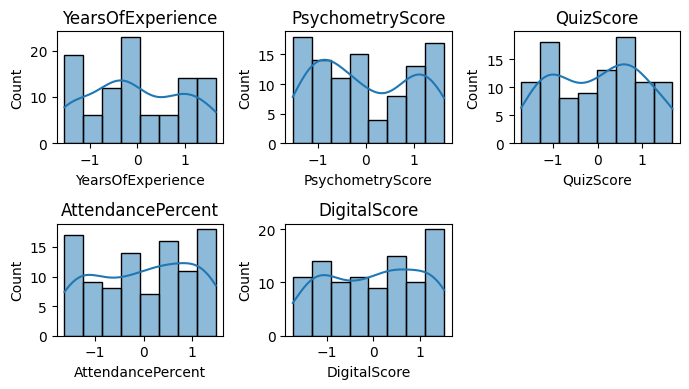

In [15]:

# Loop through each column and created histogram subplots
plt.figure(figsize=(7, 4))
for i, col in enumerate(df_scaled_numeric_columns.columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_scaled_numeric_columns[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()


In [16]:
# Creating final dataframe
df_final= pd.concat([df_scaled_numeric_columns, df_categorical_columns_integer], axis=1)
df_final.head()

,YearsOfExperience,PsychometryScore,QuizScore,AttendancePercent,DigitalScore,PreviousEmployer_Accenture,PreviousEmployer_Capgemini,PreviousEmployer_IBM,PreviousEmployer_Infosys,PreviousEmployer_Others,PreviousEmployer_TCS,PreviousEmployer_Wipro,RAGScore_Amber,RAGScore_Green,RAGScore_Red,TrainingOutcome_Clear,TrainingOutcome_Not Clear
0,0.382158,1.576218,1.108564,1.486402,-0.158179,0,0,0,0,0,0,1,0,1,0,1,0
1,-0.573237,-0.894014,-1.261150,-1.572552,-1.620797,0,0,0,0,1,0,0,1,0,0,0,1
2,-0.254772,0.945520,-0.162990,0.549987,0.708557,0,0,0,1,0,0,0,1,0,0,0,1
3,-1.528631,-0.315874,1.513149,1.486402,1.250267,0,0,0,0,0,0,1,0,1,0,0,1
4,1.656017,-0.315874,-1.203352,-0.199144,-0.537377,0,0,0,0,1,0,0,0,1,0,1,0


In [17]:
# Creating train and test data
from sklearn.model_selection import train_test_split


In [18]:
X= df_final.drop(columns=['TrainingOutcome_Clear','TrainingOutcome_Not Clear'], axis=1)
X.shape

(100, 15)

In [19]:
y= df_final['TrainingOutcome_Clear']
y.shape

(100,)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
# Ussing Logistic Regression since this is binary classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


lr_model= LogisticRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

#Final Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.75

Confusion Matrix:
 [[8 1]
 [4 7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.89      0.76         9
           1       0.88      0.64      0.74        11

    accuracy                           0.75        20
   macro avg       0.77      0.76      0.75        20
weighted avg       0.78      0.75      0.75        20



In [21]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LogisticRegression(), X, y, cv=5)
print(scores)
print("Average Accuracy:", scores.mean())


[0.65 0.7  0.7  0.75 0.8 ]
Average Accuracy: 0.72


In [22]:
# Using RandomForest Now

from sklearn.ensemble import RandomForestClassifier

X2= df_final.drop(columns=['TrainingOutcome_Clear','TrainingOutcome_Not Clear'], axis=1)
X2.shape

(100, 15)

In [23]:
y2= df_final['TrainingOutcome_Clear']
y2.shape

(100,)

In [24]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=21)

rf_model= RandomForestClassifier()
rf_model.fit(X2_train, y2_train)

y2_pred = rf_model.predict(X2_test)

#Final Evaluation
print("Accuracy:", accuracy_score(y2_test, y2_pred))

Accuracy: 0.7


In [25]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(RandomForestClassifier(), X2, y2, cv=5)
print(scores)
print("Average Accuracy:", scores.mean())

[0.65 0.65 0.6  0.6  0.85]
Average Accuracy: 0.67


In [26]:
#trying XGBoost
from xgboost import XGBClassifier

xgb_model= XGBClassifier()
xgb_model.fit(X2_train, y2_train)

y2_pred_xgb = xgb_model.predict(X2_test)

#Final Evaluation
print("Accuracy:", accuracy_score(y2_test, y2_pred_xgb))

Accuracy: 0.6


In [27]:
scores = cross_val_score(XGBClassifier(), X2, y2, cv=5)
print(scores)
print("Average Accuracy:", scores.mean())

[0.6  0.45 0.65 0.65 0.8 ]
Average Accuracy: 0.6300000000000001


In [28]:
# Since the best score so far was 72% by logistic regression,
# we will try to now use Grid SearchCV to see the best results across all the models

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Dummy pipeline: just the model (no scaling since data is preprocessed)
pipe = Pipeline([
    ('clf', LogisticRegression())
])


param_grid = [
    # Logistic Regression: Wider range of regularization strengths
    {
        'clf': [LogisticRegression(max_iter=500)],
        'clf__C': [0.001, 0.01, 0.1, 1, 10, 100]
    },

    # Random Forest: Deeper trees, more estimators, and minimum samples per leaf
    {
        'clf': [RandomForestClassifier(random_state=42)],
        'clf__n_estimators': [100, 200, 300],
        'clf__max_depth': [None, 10, 20, 30],
        'clf__min_samples_split': [2, 5],
        'clf__min_samples_leaf': [1, 2]
    },

    # XGBoost: More boosting rounds, different depths, and learning rates
    {
        'clf': [XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)],
        'clf__n_estimators': [100, 200, 300],
        'clf__max_depth': [3, 5, 7],
        'clf__learning_rate': [0.01, 0.05, 0.1],
        'clf__subsample': [0.8, 1],
        'clf__colsample_bytree': [0.8, 1]
    }
]



In [29]:
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid.fit(X2_train, y2_train)

# Evaluate Best Model
best_model = grid.best_estimator_
y_pred = best_model.predict(X2_test)


print("Best Model:", best_model)
print("Best Parameters:", grid.best_params_)
print("Cross-Validation Accuracy:", grid.best_score_)
print("Test Accuracy:", accuracy_score(y2_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y2_test, y_pred))
print("\nClassification Report:\n", classification_report(y2_test, y_pred))


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Model: Pipeline(steps=[('clf', LogisticRegression(C=1, max_iter=500))])
Best Parameters: {'clf': LogisticRegression(max_iter=500), 'clf__C': 1}
Cross-Validation Accuracy: 0.7625
Test Accuracy: 0.75

Confusion Matrix:
 [[8 1]
 [4 7]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.89      0.76         9
           1       0.88      0.64      0.74        11

    accuracy                           0.75        20
   macro avg       0.77      0.76      0.75        20
weighted avg       0.78      0.75      0.75        20



In [30]:
#Finally managed to achieve a 76% accuracy using Logistic Regression

In [31]:
# Publishing the code

import joblib

joblib.dump(best_model, "model.pkl")


['model.pkl']